<a href="https://colab.research.google.com/github/Arimoro2020/Forecasting-Bitcoin-Prices-/blob/main/Time_Series_Forcasting_Bitcoin_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 5.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
from statsmodels.tsa.ar_model import AutoReg

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

**Load Drive**

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Read Data file into a Dataframe**

In [6]:
df = pd.read_csv('/content/gdrive/MyDrive/Time series Transfer Learning Sequence models Image/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

**Get Data Information**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [8]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Create new Dataframe with Opening price and Timestamp**

In [9]:
df = df[['Timestamp', 'Open']]
df['DateTime'] = pd.to_datetime(df['Timestamp'], unit='s')

In [10]:
df.head()

,Timestamp,Open,DateTime
0,1325317920,4.39,2011-12-31 07:52:00
1,1325317980,NaN,2011-12-31 07:53:00
2,1325318040,NaN,2011-12-31 07:54:00
3,1325318100,NaN,2011-12-31 07:55:00
4,1325318160,NaN,2011-12-31 07:56:00


**Drop all rows with Null values**

In [11]:
df.dropna(axis=0, inplace=True)
df.head()

,Timestamp,Open,DateTime
0,1325317920,4.39,2011-12-31 07:52:00
478,1325346600,4.39,2011-12-31 15:50:00
547,1325350740,4.50,2011-12-31 16:59:00
548,1325350800,4.58,2011-12-31 17:00:00
1224,1325391360,4.58,2012-01-01 04:16:00


In [12]:
df.set_index(['DateTime'])

,Timestamp,Open
DateTime,,
2011-12-31 07:52:00,1325317920,4.39
2011-12-31 15:50:00,1325346600,4.39
2011-12-31 16:59:00,1325350740,4.50
2011-12-31 17:00:00,1325350800,4.58
2012-01-01 04:16:00,1325391360,4.58
...,...,...
2021-03-30 23:56:00,1617148560,58714.31
2021-03-30 23:57:00,1617148620,58683.97
2021-03-30 23:58:00,1617148680,58693.43


**Normalize Open prices by scaling to range 0 - 1**

In [13]:
sc = MinMaxScaler(feature_range=(0,1))
df['Open_scaled'] = (lambda x: sc.fit_transform(x))(df.Open.values.reshape(-1,1))

In [14]:
df.head()


,Timestamp,Open,DateTime,Open_scaled
0,1325317920,4.39,2011-12-31 07:52:00,0.000010
478,1325346600,4.39,2011-12-31 15:50:00,0.000010
547,1325350740,4.50,2011-12-31 16:59:00,0.000011
548,1325350800,4.58,2011-12-31 17:00:00,0.000013
1224,1325391360,4.58,2012-01-01 04:16:00,0.000013


**Set Index to DateTime for resampling dataframe**

In [15]:
time_df = df.set_index(['DateTime'])
time_df.drop(columns=['Timestamp','Open'], inplace=True)
time_df

,Open_scaled
DateTime,
2011-12-31 07:52:00,0.000010
2011-12-31 15:50:00,0.000010
2011-12-31 16:59:00,0.000011
2011-12-31 17:00:00,0.000013
2012-01-01 04:16:00,0.000013
...,...
2021-03-30 23:56:00,0.950627
2021-03-30 23:57:00,0.950136
2021-03-30 23:58:00,0.950289


In [16]:
time_series_df = time_df.resample('D').mean()


In [17]:
time_series_df

,Open_scaled
DateTime,
2011-12-31,0.000011
2012-01-01,0.000016
2012-01-02,0.000019
2012-01-03,0.000024
2012-01-04,0.000023
...,...
2021-03-27,0.893615
2021-03-28,0.903984
2021-03-29,0.921491


**Reset index & Drop Any Null Value**

In [18]:
time_series_df.reset_index(inplace=True)
time_series_df.reset_index(inplace=True)
time_df= time_series_df.dropna()



In [19]:
time_df

,index,DateTime,Open_scaled
0,0,2011-12-31,0.000011
1,1,2012-01-01,0.000016
2,2,2012-01-02,0.000019
3,3,2012-01-03,0.000024
4,4,2012-01-04,0.000023
...,...,...,...
3374,3374,2021-03-27,0.893615
3375,3375,2021-03-28,0.903984
3376,3376,2021-03-29,0.921491
3377,3377,2021-03-30,0.944693


**Select Scaled Open prices Column**

In [20]:
X = time_df.iloc[:, 2].values
X

array([1.07675289e-05, 1.62997179e-05, 1.94301273e-05, ...,
       9.21491382e-01, 9.44692881e-01, 9.51492525e-01])

**Split Data into Train and Test**

In [21]:
X_train, X_test = X[1:len(X)-31].reshape(-1, 1), X[len(X)-31:].reshape(-1, 1)

**Create Autoregression Model**

In [22]:
autoreg_model = AutoReg(endog=X_train, lags=[24,31], trend='ct')

In [23]:
autoreg_model = autoreg_model.fit()

**Make Predictions For next 31 Days**

In [25]:
predicted = autoreg_model.predict(start=len(X_train), end=(len(X_train)+len(X_test)-1))

In [26]:
predicted_price = sc.inverse_transform(predicted.reshape(-1, 1))
predicted_price 

array([[43936.13090562],
       [45737.41770376],
       [44532.13436035],
       [46949.76507464],
       [52422.31819149],
       [52080.24431731],
       [52786.66234222],
       [54072.82957929],
       [54343.85480604],
       [55303.43440826],
       [55266.87122334],
       [57666.23104222],
       [59388.04113394],
       [60443.9932016 ],
       [61925.85409002],
       [64858.33919179],
       [65940.39710655],
       [63536.19538571],
       [58359.75152429],
       [59697.05618417],
       [60137.95925858],
       [57301.95272194],
       [58601.50341708],
       [56617.5815244 ],
       [55155.12120564],
       [55326.52595888],
       [54405.79704263],
       [56746.26871975],
       [61040.62935882],
       [60842.44962177],
       [60893.60886958]])

**Get Actual Open Prices (Unscaled)**

In [27]:
filter = df['DateTime'] > '2021-03-01'
actual_price_test = df.loc[filter, :]
actual_price_test

,Timestamp,Open,DateTime,Open_scaled
4814177,1614556860,45333.46,2021-03-01 00:01:00,0.733968
4814178,1614556920,45443.65,2021-03-01 00:02:00,0.735752
4814179,1614556980,45270.26,2021-03-01 00:03:00,0.732944
4814180,1614557040,45120.00,2021-03-01 00:04:00,0.730511
4814181,1614557100,45129.92,2021-03-01 00:05:00,0.730672
...,...,...,...,...
4857372,1617148560,58714.31,2021-03-30 23:56:00,0.950627
4857373,1617148620,58683.97,2021-03-30 23:57:00,0.950136
4857374,1617148680,58693.43,2021-03-30 23:58:00,0.950289
4857375,1617148740,58742.18,2021-03-30 23:59:00,0.951079


In [28]:
actual_price_test = actual_price_test.drop(columns=['Open_scaled','Timestamp'])

In [29]:
actual_price_test.set_index('DateTime', inplace=True)
actual_price_df = actual_price_test.resample('D').mean()
actual_price_df

,Open
DateTime,
2021-03-01,47642.706335
2021-03-02,48621.235583
2021-03-03,50430.851676
2021-03-04,49402.170958
2021-03-05,47718.566826
2021-03-06,48372.653143
2021-03-07,50218.696692
2021-03-08,50798.361577
2021-03-09,53978.965319


In [30]:
actual_price_values = actual_price_df['Open'].values
actual_price_values


array([47642.70633519, 48621.23558333, 50430.85167594, 49402.17095833,
       47718.56682639, 48372.65314286, 50218.69669231, 50798.36157748,
       53978.96531944, 55376.62204451, 56273.70417651, 56828.8839375 ,
       58803.64643654, 60458.33973519, 57512.91936718, 55342.87488889,
       56158.3699722 , 58475.26805981, 58285.35796386, 58781.20122734,
       57313.97917942, 56789.78636996, 54704.39634028, 55126.66121593,
       52124.38814454, 53240.38639333, 55193.24064291, 55833.60847067,
       56914.88659471, 58347.80562369, 58767.75      ])

**Visualize Predicted & Actual Prices for Jan. 2021**

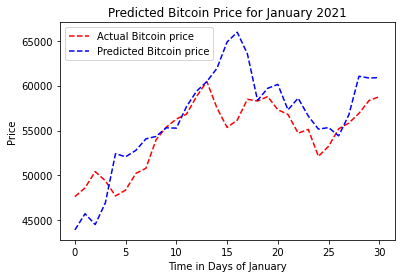

In [31]:
plt.plot(actual_price_values, color='red', label="Actual Bitcoin price", ls='--')
plt.plot(predicted_price, color='blue', label="Predicted Bitcoin price", ls='--')
plt.title('Predicted Bitcoin Price for January 2021')
plt.xlabel('Time in Days of January')
plt.ylabel('Price')
plt.legend()
plt.show()

**Evaluate Model: Root Mean Square Error**

In [32]:

rmse = sqrt(mean_squared_error(actual_price_values, predicted_price))
print(f'The RMSE is {rmse: .2f}')

The RMSE is  3675.61
